for momad, we simply compute: 

    - max,
    - median of medians.

Then compute: 

    - median of medians absolute deviation (that is another median of medians but subtracting the previous median from all samples)

Then we do 

    - (max - median of medians) /  mad * x, 
    
where x is something like 1.48

# Test 1

In [ ]:
import numpy as np

maxima = {0:[], 1:[], 2:[], 3:[]}
moms = {0:[], 1:[], 2:[], 3:[]}
mads = {0:[], 1:[], 2:[], 3:[]}
snrs = {0:[], 1:[], 2:[], 3:[]}

for i in range(10):
    j = 0
    # Generate a few arrays of different length
    a = np.random.rand(10)
    b = np.random.rand(25)
    c = np.random.rand(100)
    d = np.random.rand(250)
    for series in [a, b, c, d]:
        # MAX
        maximum = np.nanmax(series)

        # MOM
        series_mom = np.abs(series-np.median(series))
        mom = np.median(series_mom)

        # MAD
        series_mad = series - mom
        mad = np.median(series_mad)    

        # Max Signal-to-Noise Ratio
        snr = (maximum-mom)/(mad*1.48)
        
        maxima[j].append(maximum)
        moms[j].append(mom)
        mads[j].append(mad)
        snrs[j].append(snr)
        
        j+=1

#     print ("series\t\t", series)
j = 0
for series in [a, b, c, d]:
    print ("maximum\t\t", maxima[j])
    print ("mom\t\t", moms[j])
    print ("momad\t\t", mads[j])
    print ("max_snr\t", snrs[j])
    print ()
    j+=1

# Test 2

In [ ]:
import numpy as np

lens = {0:[], 1:[], 2:[], 3:[]}
maxima = {0:[], 1:[], 2:[], 3:[]}
moms = {0:[], 1:[], 2:[], 3:[]}
mads = {0:[], 1:[], 2:[], 3:[]}
snrs = {0:[], 1:[], 2:[], 3:[]}

for i in range(10):
    j = 0
    # Generate a few arrays of different length
    array = np.random.rand(2500)
    for downsampling in [1, 2, 100, 250]:
        series = array[::len(array)//(len(array)//downsampling)]
        # MAX
        maximum = np.nanmax(series)

        # MOM
        series_mom = np.abs(series-np.median(series))
        mom = np.median(series_mom)

        # MAD
        series_mad = series - mom
        mad = np.median(series_mad)    

        # Max Signal-to-Noise Ratio
        snr = (maximum-mom)/(mad*1.48)

        lens[j] = len(series)
        maxima[j].append(maximum)
        moms[j].append(mom)
        mads[j].append(mad)
        snrs[j].append(snr)
        
        j+=1

#     print ("series\t\t", series)
j = 0
for series in [a, b, c, d]:
    print ("Array of", lens[j])
    print ("maximum\t\t", maxima[j])
    print ("mom\t\t", moms[j])
    print ("momad\t\t", mads[j])
    print ("max_snr\t", snrs[j])
    print ()
    j+=1

# GOOD SECTION

In [2]:
def compute_mom(L):
    if len(L) < 10:
        L.sort()
        return L[int(len(L)/2)]
    S = []
    lIndex = 0
    
    for lIndex in range(0,len(L)-1,5):
        S.append(L[lIndex:lIndex+5])

#     while lIndex+5 < len(L)-1:
#         S.append(L[lIndex:lIndex+5])
#         lIndex += 5
    
    S.append(L[lIndex:])
    Meds = []
    
    for subList in S:
        Meds.append(compute_mom(subList))
    
    L2 = compute_mom(Meds)
    L1 = L3 = []
    
    for i in L:
        if i < L2:
            L1.append(i)
        if i > L2:
            L3.append(i)
    
    if len(L) < len(L1):
        return compute_mom(L1)
    
    elif len(L) > len(L1) + 1:
        return compute_mom(L3)
    
    else:
        return L2

## Generate SNR data

In [12]:
import numpy as np

def init_dict_list(dictionary, key):
    try: 
        dictionary[key]
    except KeyError:
        dictionary[key] = []
    return dictionary

def noise_transients_experiment(print_log=False):
    seriess = {}
    lens = {}
    maxima = {}
    moms = {}
    mads = {}
    snrs = {}

    downsample_factors = [250, 200, 150, 100, 50, 25, ]#10, 1,]
    loop = 1000

    if print_log:
        print ("downsampling", "maximum", "mom", "mad")
    for i in range(loop):
        # Generate a few arrays of different length
        array = np.random.normal(0,1,2500)

        for downsampling in range(300, 0, -5):
            series = array[::len(array)//(len(array)//downsampling)]
            # MAX
            maximum = np.nanmax(series)

            # MOMz
            mom = compute_mom(series)

            # MAD
            series_mad = series - mom
            mad = np.median(series_mad)    

            if print_log:
                print (downsampling, maximum, mom, mad)
            snr = (maximum-mom)/(mad*1.48)

            lens[i] = len(series)
            if snr >= 10:
                init_dict_list(maxima,i)[i].append(maximum)
                init_dict_list(moms,i)[i].append(mom)
                init_dict_list(mads,i)[i].append(mad)
                init_dict_list(snrs,i)[i].append(snr)

    return seriess, lens, maxima, moms, mads, snrs

In [13]:
seriess, lens, maxima, moms, mads, snrs = noise_transients_experiment(False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars


### Print some info

In [14]:
print ("Triggers:")
print ("=========")
for j in range(300, 0, -5):
    print ("Array of", lens[j])
#     print ("series:\t", seriess[j])
    print ("maximum\t\t", maxima[j])
    print ("mom\t\t", moms[j])
    print ("momad\t\t", mads[j])
    print ("max_snr\t", snrs[j])
    print ()

Triggers:


NameError: name 'downsample_factors' is not defined

KeyError: 300

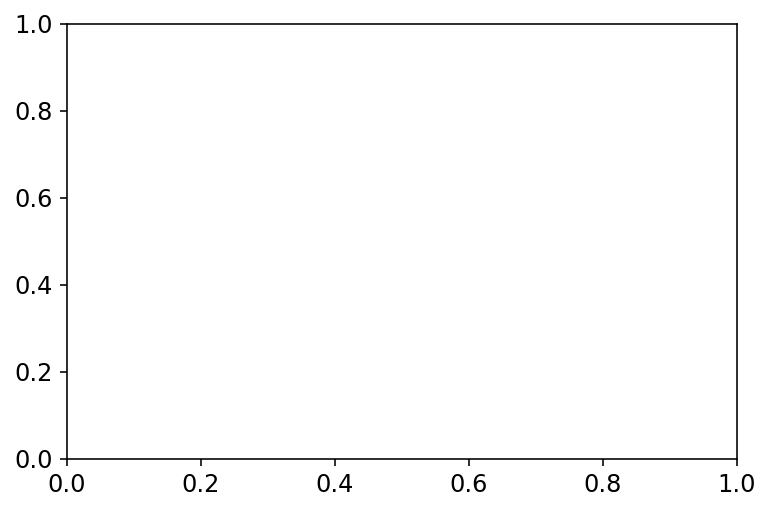

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rc
rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

fig, ax = plt.subplots()

#for j in range(len(downsample_factors)):
for j in range(300, 0, -5):
    ax.scatter(lens[j], len(snrs[j])/loop, label= str(lens[j]) + " samples")
    ax.set_xlabel("N")
    ax.set_ylabel("Triggers fraction")
    ax.legend()
    
plt.savefig("10000windows_method2.pdf")

In [ ]:
normal_dist = np.random.normal(0,1,2500)

In [ ]:
print (np.min(normal_dist), np.max(normal_dist))

In [ ]:
for lIndex in range(0,20,5):
    print (lIndex)

In [ ]:
for downsampling in range(300, 0, -50):
    print (downsampling)

In [ ]:
dictionary = {}
if dictionary[2] != None: 
    print ("allo")